## import modules

In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path

## import data

In [2]:
surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
#n_surface_areas = ['SA19', 'SA19.5', 'SA20', 'SA20.5','SA21','SA22','SA23','SA24']
filedir = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
#filedir1 = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
#logfiles = []
xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in surface_areas:
    xvgchunk = []
    timesteps=np.array([0])
    pressures=np.array([0])
    for i in range(1, 21):
        xvg = Path(filedir+area+'/step9_'+str(i)+'.xvg')
        if xvg.exists():
            xvgchunk.append(filedir+area+'/step9_'+str(i)+'.xvg')
    for p, x in enumerate(xvgchunk):
        #print(p)
        if p == 0:
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]
            #print(timesteps)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #print(pressures)
        else:
            np.append(timesteps, timesteps[-1]+np.genfromtxt(x,dtype='float', skip_header=24)[:,0])
            np.append(pressures, (np.genfromtxt(x, dtype='float', skip_header=24)/20)[:,1])
            #print(pressures)
    #print(np.mean(70.5-pressures))
    if len(xvgchunk)>0:
        pres.append(70.5-pressures)
        times.append(timesteps)
        areas.append(area)
        xvgfiles.append(xvgchunk)
#print(len(xvgfiles))
#print(xvgfiles)
#print(len(times))
#print(times)
#print(len(pres))
#print(pres)
print(areas)

['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns', 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns', 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns', 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 'SA22_20ns', 'SA22-2_20ns', 'SA24_20ns', 'SA24-2_20ns']


In [3]:
def getIncrementedData(step, x, y):
    newx = []
    newy = []
    yerr = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        yerr.append(np.std(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy, yerr)

In [4]:
def getMeanData():
    chunk = []
    for p in pres:
        chunk.append(np.mean(p))
    return chunk
L = getMeanData()

### Convergence Analysis of 100ns

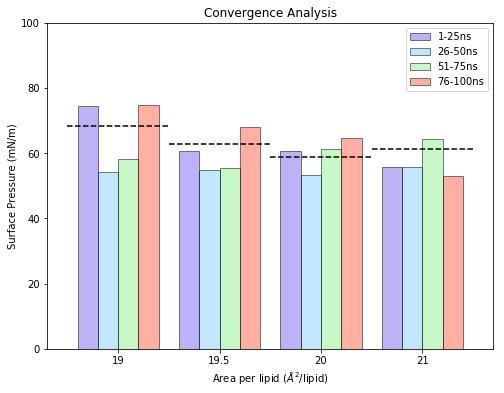

In [5]:
plt.figure(figsize=(8,6))
plt.subplot(111)
w = 20
ec='k'
a = 0.5
#print(times[2][-1])
#print(len(times[2]))
plt.xticks([50, 150, 250, 350], ('19', '19.5', '20', '21'))
A,B,C = getIncrementedData(1000, times[2]/100, pres[2])
plt.title('Convergence Analysis')
plt.ylabel('Surface Pressure (mN/m)')
plt.xlabel('Area per lipid ($\AA^2$/lipid)')

plt.bar(A[0], B[0], width=w, color='mediumslateblue', alpha=a, label='1-25ns', edgecolor = ec)
plt.bar(A[1], B[1], width=w, color='lightskyblue', alpha=a, label='26-50ns', edgecolor = ec)
plt.bar(A[2], B[2], width=w, color='lightgreen', alpha=a, label='51-75ns', edgecolor = ec)
plt.bar(A[3], B[3], width=w, color='tomato', alpha=a, label='76-100ns', edgecolor = ec)

D,E,F = getIncrementedData(1000, times[3]/100, pres[3])
plt.bar(D[0]+100, E[0], width=w, color='mediumslateblue', alpha=a,  edgecolor = ec)
plt.bar(D[1]+100, E[1], width=w, color='lightskyblue', alpha=a,  edgecolor = ec)
plt.bar(D[2]+100, E[2], width=w, color='lightgreen', alpha=a,  edgecolor = ec)
plt.bar(D[3]+100, E[3], width=w, color='tomato', alpha=a, edgecolor = ec)

G,H,I = getIncrementedData(1000, times[6]/100, pres[6])
plt.bar(G[0]+200, H[0], width=w, color='mediumslateblue', alpha=a,  edgecolor = ec)
plt.bar(G[1]+200, H[1], width=w, color='lightskyblue', alpha=a,  edgecolor = ec)
plt.bar(G[2]+200, H[2], width=w, color='lightgreen', alpha=a,  edgecolor = ec)
plt.bar(G[3]+200, H[3], width=w, color='tomato', alpha=a, edgecolor = ec)

J,K,L = getIncrementedData(1000, times[7]/100, pres[7])
plt.bar(J[0]+300, K[0], width=w, color='mediumslateblue', alpha=a, edgecolor = ec)
plt.bar(J[1]+300, K[1], width=w, color='lightskyblue', alpha=a, edgecolor = ec)
plt.bar(J[2]+300, K[2], width=w, color='lightgreen', alpha=a, edgecolor = ec)
plt.bar(J[3]+300, K[3], width=w, color='tomato', alpha=a, edgecolor = ec)

plt.plot([0, 100], [np.mean(pres[2]), np.mean(pres[2])], color='k', ls='dashed')
plt.plot([100, 200], [np.mean(pres[3]), np.mean(pres[3])], color='k', ls='dashed')
plt.plot([200, 300], [np.mean(pres[6]), np.mean(pres[6])], color='k', ls='dashed')
plt.plot([300, 400], [np.mean(pres[7]), np.mean(pres[7])], color='k', ls='dashed')
plt.legend(loc=1)
plt.ylim(0,100)

plt.savefig('/home/drez/Desktop/convergence.png', dpi=600)

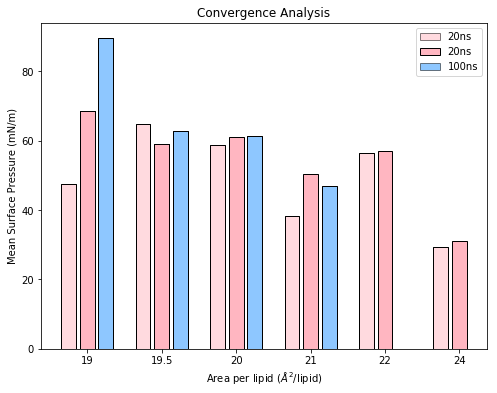

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(111)
w = 20
ec = 'k'
a = 0.5
M = getMeanData()
plt.xticks([2, 6, 10, 14, 18, 22], ('19', '19.5', '20', '21', '22', '24'))
plt.title('Convergence Analysis')
plt.ylabel('Mean Surface Pressure (mN/m)')
plt.xlabel('Area per lipid ($\AA^2$/lipid)')
#SA19
plt.bar(1, M[0], color = 'lightpink', alpha = a, label='20ns', edgecolor = ec)#20ns
plt.bar(1, M[0], color = 'none', edgecolor = ec)#20ns
plt.bar(2, M[2], color = 'lightpink', label='20ns', edgecolor = ec)#20ns
plt.bar(2, M[2], color = 'none', edgecolor = ec)#20ns
plt.bar(3, M[1], color = 'dodgerblue', alpha = a, label='100ns', edgecolor = ec)#100ns
plt.bar(3, M[1], color = 'none', edgecolor = ec)#20ns
#SA19.5 
plt.bar(5, M[4], color = 'lightpink', alpha = a, edgecolor = ec)#20ns
plt.bar(5, M[4], color = 'none', edgecolor = ec)#20ns
plt.bar(6, M[5], color = 'lightpink', edgecolor = ec)#20ns
plt.bar(6, M[5], color = 'none', edgecolor = ec)#20ns
plt.bar(7, M[3], color = 'dodgerblue', alpha = a, edgecolor = ec)#100ns
plt.bar(7, M[3], color = 'none', edgecolor = ec)#100ns
#SA20
plt.bar(9, M[6], color = 'lightpink', alpha = a, edgecolor = ec)#20ns
plt.bar(9, M[6], color = 'none', edgecolor = ec)#20ns
plt.bar(10, M[7], color = 'lightpink', edgecolor = ec)#20ns
plt.bar(11, M[8], color = 'dodgerblue', alpha = a, edgecolor = ec)#100ns
plt.bar(11, M[8], color = 'none', edgecolor = ec)#100ns
#SA21
plt.bar(13, M[10], color = 'lightpink', alpha = a, edgecolor = ec)#20ns
plt.bar(13, M[10], color = 'none', edgecolor = ec)#20ns
plt.bar(14, M[11], color = 'lightpink', edgecolor = ec)#20ns
plt.bar(15, M[9], color = 'dodgerblue', alpha = a, edgecolor = ec)#100ns
plt.bar(15, M[9], color = 'none', edgecolor = ec)#100ns
#SA22
plt.bar(17, M[12], color = 'lightpink', alpha = a, edgecolor = ec)#20ns
plt.bar(17, M[12], color = 'none', edgecolor = ec)#20ns
plt.bar(18, M[13], color = 'lightpink', edgecolor = ec)#20ns
#SA24
plt.bar(21, M[14], color = 'lightpink', alpha = a, edgecolor = ec)#20ns
plt.bar(21, M[14], color = 'none', edgecolor = ec)
plt.bar(22, M[15], color = 'lightpink', edgecolor = ec)

plt.legend(loc=1)
plt.savefig('/home/drez/Desktop/mean_convergence.png', dpi=600)

In [7]:
#SA19 Scatter Plot


TypeError: getIncrementedData() takes exactly 3 arguments (2 given)

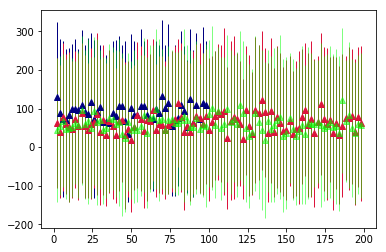

In [8]:
N,O,P = getIncrementedData(100, times[1]/100, pres[1])
plt.errorbar(N,O, color='navy', yerr=P, ecolor='navy', ls='none', marker='^', elinewidth=1, label='SA19')
Q,R,S = getIncrementedData(100, times[3]/100, pres[3])
plt.errorbar(Q,R, color='crimson', yerr=S, ecolor='crimson', ls='none', marker='^', elinewidth=1, label='SA19.5')
T,U,V = getIncrementedData(100, times[8]/100, pres[8])
plt.errorbar(T,U, color='lime', yerr=V, ecolor='lime', ls='none', marker='^', elinewidth=1, label='SA20', alpha=0.5)
W,X,Y = getIncrementedData(100, times[9/100], pre)
plt.legend(loc=1)